---
# Plankton Recognition Challenge
## Group 18: Anh Tuan DAO - Thu Ha PHI 
---

Plankton comprises all the organisms freely drifting with ocean currents. These life forms are a critically important piece of oceanic ecosystems, accounting for more than half the primary production on earth and nearly half the total carbon fixed in the global carbon cycle. They also form the foundation of aquatic food webs, including those of large, commercially important fisheries. Loss of plankton populations could result in ecological upheaval as well as negative societal impacts, particularly in indigenous cultures and the developing world. Plankton’s global significance makes their population levels an ideal measure of the health of the world’s oceans and ecosystems.

Traditional methods for measuring and monitoring plankton populations are time consuming and cannot scale to the granularity or scope necessary for large-scale studies. Improved approaches are needed. One such approach is through the use of underwater imagery sensors. 

In this challenge, which was prepared in cooperation with the Laboratoire d’Océanographie de Villefranche, jointly run by Sorbonne Université and CNRS, plankton images were acquired in the bay of Villefranche, weekly since 2013 and manually engineered features were computed on each imaged object. 

This challenge aims at developing solid approaches to plankton image classification. As an alternative, it is possible to use methods based on carefully (but manually) engineered features. This is in sharp contrast with “Deep Learning” methods in which features will be learned from image data alone.

The purpose of this challenge is for you to learn about the commonly used paradigms when working with real-life problems. This means you can choose one of the following paths:

- Work directly with the provided images, e.g. using a (convolutional) neural network
- Work with the supplied features extracted from the images (*native* or *skimage* or both of them)
- Extract your own features from the provided images using a technique of your choice

You will find a detailed description about the image data and the features at the end of this text.
In any case, the choice of the classifier that you decide to work with strongly depends on the choice of features.

Please bear in mind that the purpose of this challenge is not to find the best-performing model (e.g. on Kaggle there are competitions to do just that, with similar data as for this challenge). You should rather make sure to understand the dificulties that come with computer vision task, should you take this modeling approach. Moreover, you should be able to justify your choice of features/model and be able to explain its advantages and disadvantages for the task.

**IMPORTANT**: please refer to the AML course guidelines concerning grading rules. Pay especially attention to the **presentation quality** item, which boils down to: don't dump a zillion of lines of code and plots in this notebook. Produce a concise summary of your findings: this notebook can exist in two versions, a "scratch" version that you will use to work and debug, a "presentation" version that you will submit. The "presentation" notebook should go to the point, and convay the main findings of your work.

---
## Overview

Beyond simply producing a well-performing model for making predictions, in this challenge we would like you to start developing your skills as a machine learning scientist.
In this regard, your notebook should be structured in such a way as to explore the following tasks that are expected to be carried out whenever undertaking such a project.
The description below each aspect should serve as a guide for your work, but you are strongly encouraged to also explore alternative options and directions. 
Thinking outside the box will always be rewarded in these challenges.


### 1. Data preparation:
   
_Data exploration_: The first broad component of your work should enable you to familiarise yourselves with the given data, an outline of which is given at the end of this challenge specification. Among others, you can work on:
   
* Data cleaning, e.g. treatment of categorial variables;
* Data visualisation; Computing descriptive statistics, e.g. correlation.

What is new in this challenge is that you will be working with image data. Therefore, you should have a look at example images located in the *imgs.zip* file (see description below). If you decide to work with the native or the skimage features, make sure to understand them!

Among others, this section should investigate:

- Distribution of the different image dimensions (including the number of channels)
- Distribution of the different labels that the images are assigned to

The image labels are organized in a taxonomy. We will measure the final model performance for the classification into the *level2* categories. Make sure to understand the meaning of this label inside the taxonomy.

_Data Pre-processing_: The previous step should give you a better understanding of which pre-processing is required for the data. This may include:

* Normalising and standardising the given data;
* Removing outliers;
* Carrying out feature selection, possibly using metrics derived from information theory;
* Handling missing information in the dataset;
* Augmenting the dataset with external information;
* Combining existing features.

Please take also note of the following aspects, that are related to this particular challente:

- If you decide to work with the provided features, some data cleaning may be required to make full use of all the data.
- If you decide to extract your own features from the images, you should explain your approach in this section.
- If you decide to work directly with the images themselves, preprocessing the images may improve your classification results. In particular, if you work with a neural network the following should be of interest to you:

  - Due to the fully-connected layers (that usually come after the convolutional ones), the input needs to have a fixed dimension.
  - Data augmentation (image rotation, scaling, cropping, etc. of the existing images) can be used to increase the size of the training data set. This may improve performance especially when little data is available for a particular class.
  - Be aware of the computational cost! It might be worth rescaling the images to a smaller size!

  All of the operations above are usually realized using a dataloader. This means that you do not need to create a modified version of the dataset and save it to disk. Instead, the dataloader processes the data "on the fly" and in-memory before passing it to the network.
  
    NB: Although aligning image sizes is necessary to train CNNs, this will prevent your classifier from learning about different object sizes as a feature. Additional gains may be achieved when also taking object sizes into account.

### 2. Model selection
An important part of the work involves the selection of a model that can successfully handle the given data and yield sensible predictions. Instead of focusing exclusively on your final chosen model, it is also important to share your thought process in this notebook by additionally describing alternative candidate models. There is a wealth of models to choose from, such as decision trees, random forests, (Bayesian) neural networks, Gaussian processes, LASSO regression, and so on. 

Irrespective of your choice, it is highly likely that your model will have one or more parameters that require tuning. There are several techniques for carrying out such a procedure, such as cross-validation.

### 3. Performance Evaluation
For the evaluation of the classification results in this challenge, you should use the F1 measure. Here the focus should be on level2 classification.

You should indicate your final evaluation score on a held-out test set. As an evaluation metric you should use the F1 score with the *average=macro* option as it is provided by the scikit-learn library. See the following link for more information:
        
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Please note that you are responsible for creating a sensible train/validation/test split. There is no predefined held-out test data.

---
## Dataset Description

#### * Location of the Dataset on the cloud platform
The data for this challenge is located at: `/mnt/datasets/plankton/flowcam`

#### * Hierachical Taxonomy Tree for Labels 

Each object is represented by a single image and is identified by a unique integer number. It has a name associated to it which is integrated in a hierarchical taxonomic tree. The identifications are gathered from different projects, classified by different people in different contexts, so they often target different taxonomic levels. For example, let us say we classify items of clothing along the following tree

    top
        shirt
            long sleeves
            short sleeves
        sweater
            hooded
            no hood
    bottom
        pants
            jeans
            other
        shorts
        
In a first project, images are classified to the finest level possible, but it may be the case that, on some pictures, it is impossible to determine whether a sweater has a hood or not, in which case it is simply classified as `sweater`. In the second project, the operator classified tops as `shirt` or `sweater` only, and bottoms to the finest level. In a third project, the operator only separated tops from bottoms. In such a context, the original names in the database cannot be used directly because, for example `sweater` will contain images that are impossible to determine as `hooded` or `no hood` *as well as* `hooded` and `no hood` images that were simply not classified further. If all three classes (`sweater`, `hooded`, and `no hood`) are included in the training set, it will likely confuse the classifier. For this reason, we define different target taxonomic levels:

-   `level1` is the finest taxonomic level possible. In the example above, we would include `hooded` and `no hood` but discard all images in `sweater` to avoid confusion; and proceed in the same manner for other classes.

-   `level2` is a grouping of underlying levels. In the example above, it would include `shirt` (which contains all images in `shirt`, `long sleeves`, and `short sleeves`), `sweater` (which, similarly would include this class and all its children), `pants` (including children), and `shorts`. So typically, `level2` contains more images (less discarding), sorted within fewer classes than `level1`, and may therefore be an easier classification problem.

-   `level3` is an even broader grouping. Here it would be `top` vs `bottom`

-   etc.

In the Plankton Image dataset, the objects will be categorised based on a pre-defined 'level1' and 'level2'. You can opt to work on one of them, but we recommend you to work on `level2` because it is an easier classification problem.  

#### * Data Structure

    /mnt/datasets/plankton/flowcam/
        meta.csv
        taxo.csv
        features_native.csv.gz
        features_skimage.csv.gz
        imgs.zip

* `meta.csv` contains the index of images and their corresponding labels
* `taxo.csv` defines the taxonomic tree and its potential groupings at various level. Note that, the information is also available in `meta.csv`. Therefore, the information in `taxo.csv` is probably useless, but at least it gives you a global view about taxonomy tree
* `features_native.csv.gz` contain the morphological handcrafted features computed by ZooProcess. In fact, ZooProcess generates the region of interests (ROI) around each individual object from a original image of Plankton. In addition, it also computes a set of associated features measured on the object. These features are the ones contained in `features_native.csv.gz`
* `features_skimage.csv.gz` contains the morphological features recomputed with skimage.measure.regionprops on the ROIs produced by ZooProcess.
* `imgs.zip` contains a post-processed version of the original images. Images are named by `objid`.jpg

#### * Attributes in meta.csv

The file contains the image identifiers (objid) as well as the labels assigned to the images by human operators. Those are defined with various levels of precision:

* <i>unique_name</i>: raw labels from operators
* <i>level1</i>: cleaned, most detailed labels
* <i>level2</i>: regrouped (coarser) labels
* <i>lineage</i>: full taxonomic lineage of the class

Some labels may be missing (coded ‘NA’) at a given level, meaning that the corresponding objects should be discarded for the classification at this level.

#### * imgs.zip

This zip archive contains an *imgs* folder that contains all the images in .jpg format. Do not extract this folder to disk! Instead you will be loading the images to memory. See the code below for a quick how-to:

#### * Attributes in features_native.csv.gz
A brief outline of the availabel attributes in `features_native.csv.gz` which you can use is given below:

* <i>objid</i>: same as in `meta.csv`
* <i>area</i>: area of ROI
* <i>meanimagegrey</i>:
* <i>mean</i>: mean grey
* <i>stddev</i>: standard deviation of greys
* <i>min</i>: minimum grey
* <i>perim.</i>: perimeter of ROI
* <i>width, height</i>: dimensions of ROI
* <i>major, minor</i>: length of major,minor axis of the best fitting ellipse
* <i>angle</i>: 
* <i>circ.</i>: circularity or shape factor which can be computed by 4pi(area/perim.^2)
* <i>feret</i>:  maximal feret diameter
* <i>intden</i>: integrated density: mean*area
* <i>median</i>: median grey
* <i>skew, kurt</i>: skewness,kurtosis of the histogram of greys
* <i>%area</i>: proportion of the image corresponding to the object
* <i>area_exc</i>: area excluding holes
* <i>fractal</i>: fractal dimension of the perimeter
* <i>skelarea</i>: area of the one-pixel wide skeleton of the image ???
* <i>slope</i>: slope of the cumulated histogram of greys
* <i>histcum1, 2, 3</i>:  grey level at quantiles 0.25, 0.5, 0.75 of the histogram of greys
* <i>nb1, 2, 3</i>: number of objects after thresholding at the grey levels above
* <i>symetrieh, symetriev</i>: index of horizontal,vertical symmetry
* <i>symetriehc, symetrievc</i>: same but after thresholding at level histcum1
* <i>convperim, convarea</i>: perimeter,area of the convex hull of the object
* <i>fcons</i>: contrast
* <i>thickr</i>: thickness ratio: maximum thickness/mean thickness
* <i>esd</i>:
* <i>elongation</i>: elongation index: major/minor
* <i>range</i>: range of greys: max-min
* <i>meanpos</i>:  relative position of the mean grey: (max-mean)/range
* <i>centroids</i>:
* <i>cv</i>: coefficient of variation of greys: 100*(stddev/mean)
* <i>sr</i>: index of variation of greys: 100*(stddev/range)
* <i>perimareaexc</i>:
* <i>feretareaexc</i>:
* <i>perimferet</i>: index of the relative complexity of the perimeter: perim/feret
* <i>perimmajor</i>: index of the relative complexity of the perimeter: perim/major
* <i>circex</i>:
* <i>cdexc</i>:
* <i>kurt_mean</i>:
* <i>skew_mean</i>:
* <i>convperim_perim</i>:
* <i>convarea_area</i>:
* <i>symetrieh_area</i>:
* <i>symetriev_area</i>:
* <i>nb1_area</i>:
* <i>nb2_area</i>:
* <i>nb3_area</i>:
* <i>nb1_range</i>:
* <i>nb2_range</i>:
* <i>nb3_range</i>:
* <i>median_mean</i>:
* <i>median_mean_range</i>:
* <i>skeleton_area</i>:

#### * Attributes in features_skimage.csv.gz
Table of morphological features recomputed with skimage.measure.regionprops on the ROIs produced by ZooProcess. See http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops for documentation.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_images = '/content/drive/My Drive/LAB3/data/imgs.zip'
path_meta = '/content/drive/My Drive/LAB3/data/meta.csv'

# Data preparation

In [0]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm

from sklearn.utils import class_weight 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras 
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

from tensorflow.keras.applications.vgg16 import VGG16

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data explore

### Load image files and meta.csv

The number of images in the directory: 243610


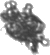

In [0]:
import zipfile
from io import BytesIO
from PIL import Image

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.jpg')}


img_files = extract_zip_to_memory(path_images)
print('The number of images in the directory: {}'.format(len(img_files)))

#Display an example image 
Image.open(img_files['imgs/32738710.jpg'])

In [0]:
df = pd.read_csv(path_meta, delimiter = ',', dtype={'level2': str, 'objid': int})
df.dtypes

objid            int64
projid           int64
id               int64
status          object
latitude       float64
longitude      float64
objdate         object
objtime         object
depth_min        int64
depth_max        int64
unique_name     object
lineage         object
level1          object
level2          object
dtype: object

### Find missing labeled samples

In [0]:
data = df[['objid', 'level2']]

In [0]:
data.isnull().sum().sort_values(ascending=False)

level2    1003
objid        0
dtype: int64

In [0]:
null_objids = data[data['level2'].isnull()]['objid'].tolist()
for i in null_objids:
    file_path = os.path.join('imgs', str(i) + '.' + 'jpg')
    del img_files[file_path]
data = data.dropna()

In [0]:
data['objid'].count()

242607

### Draw distribution of image sizes

In [0]:

image_sizes = np.zeros((data['objid'].count(),3))

for i, objid in enumerate(data['objid']):
    img = Image.open(img_files['imgs/'+str(int(objid))+'.jpg'])
#     print(img.size[1])
    image_sizes[i,0] = img.size[0]
    image_sizes[i,1] = img.size[1]
    if (len(img.size) == 2):
        image_sizes[i,2] = 1
    elif (len(img.size) == 3):
        image_sizes[i,2] = img.size[2]

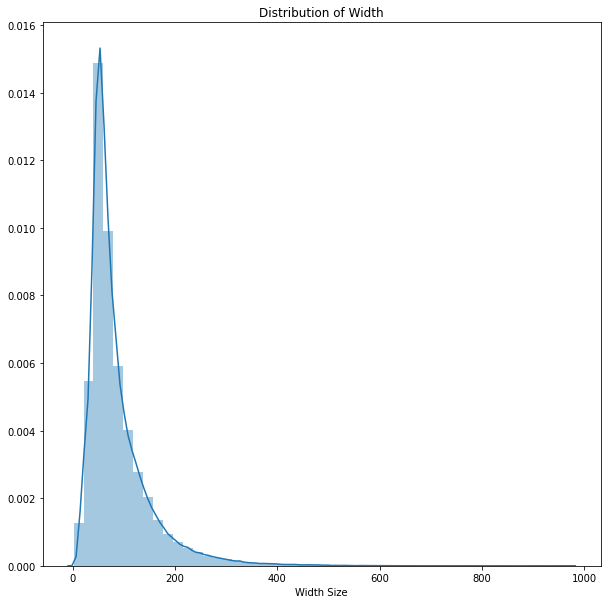

DescribeResult(nobs=242607, minmax=(2.0, 972.0), mean=86.60837898329397, variance=3857.9036795759494, skewness=2.6379112798833066, kurtosis=11.20442721834197)

In [0]:
width = image_sizes[:,0]

fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(width)
ax.set_title('Distribution of Width')
ax.set_xlabel('Width Size')
plt.show()

stats.describe(width)

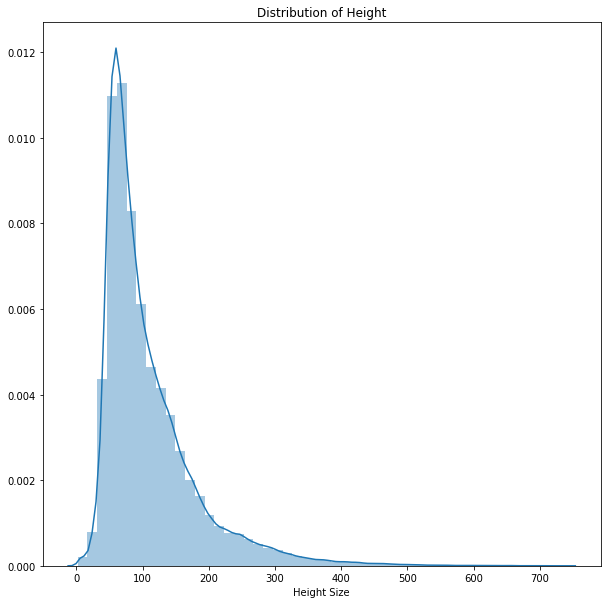

DescribeResult(nobs=242607, minmax=(2.0, 739.0), mean=109.30292613156257, variance=5174.956758500364, skewness=2.1424833092968805, kurtosis=6.613865498886041)

In [0]:
hight = image_sizes[:,1]

fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(hight)
ax.set_title('Distribution of Height')
ax.set_xlabel('Height Size')
plt.show()

stats.describe(hight)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


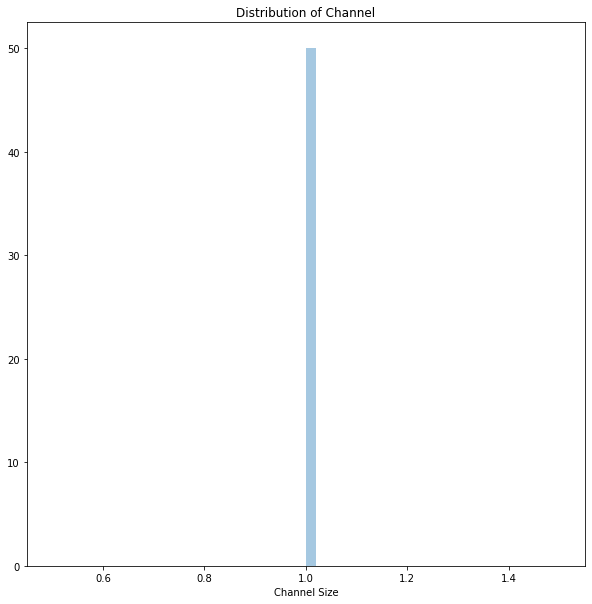

DescribeResult(nobs=242607, minmax=(1.0, 1.0), mean=1.0, variance=0.0, skewness=0.0, kurtosis=-3.0)

In [0]:
channel = image_sizes[:,2]

fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(channel)
ax.set_title('Distribution of Channel')
ax.set_xlabel('Channel Size')
plt.show()

stats.describe(channel)

### Draw distribution of classes

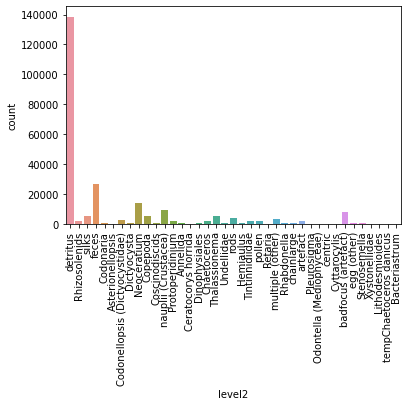

In [0]:
g = sns.countplot(data['level2'])
g.set_xticklabels(g.get_xticklabels(),rotation=90);
sns.set(rc={'figure.figsize':(6,6)})

## Data pre-processing

In [0]:
img_list = 'imgs/' + data['objid'].astype('str') + '.jpg'

In [0]:
len(img_list)

242607

### Resize images and do Pixel Normalization

In [0]:
IMAGE_SIZE = 32

X = np.zeros((len(img_list), IMAGE_SIZE, IMAGE_SIZE,1))
i = 0
for _,img in enumerate(img_list):
    np_arr = np.array(Image.open(img_files[img]).resize([IMAGE_SIZE,IMAGE_SIZE],Image.ANTIALIAS))
    np_arr = np.absolute(np.divide(np_arr.astype(float), 255) - 1.0)
    np_arr = np_arr.reshape(IMAGE_SIZE,IMAGE_SIZE,1)
    X[i]=np_arr
    i += 1

del img_files

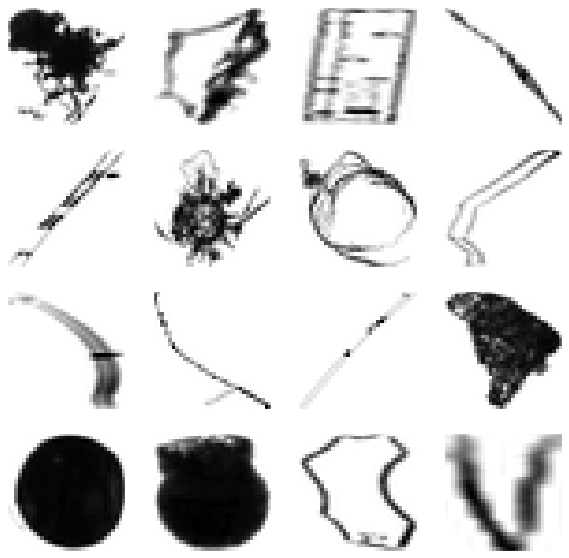

In [0]:
fig, axes = plt.subplots(4, 4, figsize=(10,10))
axes = axes.flatten()
for img, ax in zip( X[:16], axes):
    ax.imshow( img[:,:,0], cmap="binary")
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [0]:
print(len(data['level2'].unique()))
# data['level2'].value_counts()

39


In [0]:
y = pd.get_dummies(data['level2'])
print(X.shape)
print(y.shape)

(242607, 32, 32, 1)
(242607, 39)


### Split data into train set, val set and test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify = y_train)

In [0]:
np.save("drive/My Drive/LAB3/data/X_train", X_train)
np.save("drive/My Drive/LAB3/data/X_val", X_val)
np.save("drive/My Drive/LAB3/data/X_test", X_test)

y_train.to_csv("drive/My Drive/LAB3/data/y_train.csv", index=False)
y_val.to_csv("drive/My Drive/LAB3/data/y_val.csv", index=False)
y_test.to_csv("drive/My Drive/LAB3/data/y_test.csv", index=False)

In [0]:
del X
del y
del X_train
del y_train
del X_test
del y_test
del X_val
del y_val

## Data Augmentation

In [0]:
X_train = np.load("drive/My Drive/LAB3/data/X_train.npy")
y_train = pd.read_csv("drive/My Drive/LAB3/data/y_train.csv")

In [0]:
# check the number of sample on each class
class_dict = y_train.sum(axis=0).index.tolist()
print(class_dict)
y_train.sum(axis=0)

['Annelida', 'Asterionellopsis', 'Bacteriastrum', 'Ceratocorys horrida', 'Chaetoceros', 'Codonaria', 'Codonellopsis (Dictyocystidae)', 'Copepoda', 'Coscinodiscids', 'Cyttarocylis', 'Dictyocysta', 'Dinophysiales', 'Hemiaulus', 'Lithodesmioides', 'Neoceratium', 'Odontella (Mediophyceae)', 'Pleurosigma', 'Protoperidinium', 'Retaria', 'Rhabdonella', 'Rhizosolenids', 'Stenosemella', 'Thalassionema', 'Tintinnidiidae', 'Undellidae', 'Xystonellidae', 'artefact', 'badfocus (artefact)', 'centric', 'chainlarge', 'detritus', 'egg (other)', 'feces', 'multiple (other)', 'nauplii (Crustacea)', 'pollen', 'rods', 'silks', 'tempChaetoceros danicus']


Annelida                            308
Asterionellopsis                     75
Bacteriastrum                         8
Ceratocorys horrida                 119
Chaetoceros                        1347
Codonaria                           541
Codonellopsis (Dictyocystidae)     1848
Copepoda                           3291
Coscinodiscids                      214
Cyttarocylis                         64
Dictyocysta                         351
Dinophysiales                       336
Hemiaulus                           429
Lithodesmioides                      43
Neoceratium                        8969
Odontella (Mediophyceae)             84
Pleurosigma                         122
Protoperidinium                    1444
Retaria                             165
Rhabdonella                         234
Rhizosolenids                      1383
Stenosemella                        229
Thalassionema                      3275
Tintinnidiidae                     1425
Undellidae                          454


In [0]:
y_train.shape

(155268, 39)

### Split samples into subsets for generating data step

In [0]:
# List class which has the number of sample less than 100
verylowFreqClasses = y_train.columns[y_train.sum(axis=0) < 100]
y_train[verylowFreqClasses].sum(axis=0)

Asterionellopsis            75
Bacteriastrum                8
Cyttarocylis                64
Lithodesmioides             43
Odontella (Mediophyceae)    84
Xystonellidae               24
centric                     93
tempChaetoceros danicus     39
dtype: int64

In [0]:
# List class which has the number of sample (>= 100 and < 1000)
lowFreqClasses = y_train.columns[(y_train.sum(axis=0) >= 100).values * (y_train.sum(axis=0) < 1000).values]
y_train[lowFreqClasses].sum(axis=0)

Annelida               308
Ceratocorys horrida    119
Codonaria              541
Coscinodiscids         214
Dictyocysta            351
Dinophysiales          336
Hemiaulus              429
Pleurosigma            122
Retaria                165
Rhabdonella            234
Stenosemella           229
Undellidae             454
chainlarge             481
egg (other)            438
dtype: int64

In [0]:
# List class which has the number of sample (>= 1000 and < 10000)
mediFreqClasses = y_train.columns[(y_train.sum(axis=0) >= 1000).values * (y_train.sum(axis=0) < 10000).values]
y_train[mediFreqClasses].sum(axis=0)

Chaetoceros                       1347
Codonellopsis (Dictyocystidae)    1848
Copepoda                          3291
Neoceratium                       8969
Protoperidinium                   1444
Rhizosolenids                     1383
Thalassionema                     3275
Tintinnidiidae                    1425
artefact                          1183
badfocus (artefact)               5022
multiple (other)                  2087
nauplii (Crustacea)               5947
pollen                            1166
rods                              2588
silks                             3602
dtype: int64

In [0]:
# List class which has the number of sample (>= 10000 and < 20000)
highFreqClasses = y_train.columns[(y_train.sum(axis=0) >= 10000).values * (y_train.sum(axis=0) < 20000).values]
y_train[highFreqClasses].sum(axis=0)

feces    17239
dtype: int64

In [0]:
# List class which has the number of sample (> 20000)
veryhighFreqClasses = y_train.columns[(y_train.sum(axis=0) >= 20000).values]
y_train[veryhighFreqClasses].sum(axis=0)

detritus    88601
dtype: int64

In [0]:
# List of index of samples in very low frequent class
verylowFreqImg_index = []
for c in verylowFreqClasses:
    idx = y_train[c][y_train[c] == 1].index.tolist()
    verylowFreqImg_index = np.append(verylowFreqImg_index, idx).astype(int)
    
print(len(verylowFreqImg_index))

430


In [0]:
# List of index of samples in low frequent class
lowFreqImg_index = []
for c in lowFreqClasses:
    idx = y_train[c][y_train[c] == 1].index.tolist()
    lowFreqImg_index = np.append(lowFreqImg_index, idx).astype(int)
    
print(len(lowFreqImg_index))

4421


In [0]:
# List of index of samples in medium frequent class
mediFreqImg_index = []
for c in mediFreqClasses:
    idx = y_train[c][y_train[c] == 1].index.tolist()
    mediFreqImg_index = np.append(mediFreqImg_index, idx).astype(int)
    
print(len(mediFreqImg_index))

44577


In [0]:
# List of index of samples in high frequent class
highFreqImg_index = []
for c in highFreqClasses:
    idx = y_train[c][y_train[c] == 1].index.tolist()
    highFreqImg_index = np.append(highFreqImg_index, idx).astype(int)
    
print(len(highFreqImg_index))

17239


In [0]:
# List of index of samples in very high frequent class
veryhighFreqImg_index = []
for c in veryhighFreqClasses:
    idx = y_train[c][y_train[c] == 1].index.tolist()
    veryhighFreqImg_index = np.append(veryhighFreqImg_index, idx).astype(int)
    
print(len(veryhighFreqImg_index))

88601


In [0]:
# Get images in very low frequent class
verylowFreqImg = X_train[verylowFreqImg_index]
print(verylowFreqImg.shape)

(430, 32, 32, 1)


In [0]:
# Get images in low frequent class
lowFreqImg = X_train[lowFreqImg_index]
print(lowFreqImg.shape)

(4421, 32, 32, 1)


In [0]:
# Get images in medium frequent class
mediFreqImg = X_train[mediFreqImg_index]
print(mediFreqImg.shape)

(44577, 32, 32, 1)


In [0]:
# Get images in high frequent class
highFreqImg = X_train[highFreqImg_index]
print(highFreqImg.shape)

(17239, 32, 32, 1)


In [0]:
# Get images in very high frequent class
veryhighFreqImg = X_train[veryhighFreqImg_index]
print(veryhighFreqImg.shape)

(88601, 32, 32, 1)


In [0]:
# Get labels in very low frequent class
verylowFreqLabel = y_train.iloc[verylowFreqImg_index]
print(verylowFreqLabel.shape)

(430, 39)


In [0]:
# Get labels in low frequent class
lowFreqLabel = y_train.iloc[lowFreqImg_index]
print(lowFreqLabel.shape)

(4421, 39)


In [0]:
# Get labels in medium frequent class
mediFreqLabel = y_train.iloc[mediFreqImg_index]
print(mediFreqLabel.shape)

(44577, 39)


In [0]:
# Get labels in high frequent class
highFreqLabel = y_train.iloc[highFreqImg_index]
print(highFreqLabel.shape)

(17239, 39)


In [0]:
# Get labels in very high frequent class
veryhighFreqLabel = y_train.iloc[veryhighFreqImg_index]
print(veryhighFreqLabel.shape)

(88601, 39)


In [0]:
# For very low frequent class, we will augment the samples 200 times
# For low frequent class, we will augment the samples 20 times
# For medium frequent class, we will augment the samples 1 times
# For high frequent class, we will keep all samples
# For very high frequent class, we will downsample 
verylowFreqMulti = 200
lowFreqMulti = 20
mediFreqMulti = 1

In [0]:
del X_train
del y_train

### Generate data

In [0]:
# downsample the very high frequncy class
generatedX_train = veryhighFreqImg[0:20000]
generatedy_train = veryhighFreqLabel[0:20000]

In [0]:
# keep the high frequncy class
generatedX_train = np.append(generatedX_train, highFreqImg, axis=0)
generatedy_train = np.append(generatedy_train, highFreqLabel, axis=0)

In [0]:
generatedX_train = np.append(generatedX_train, verylowFreqImg, axis=0)
generatedy_train = np.append(generatedy_train, verylowFreqLabel, axis=0)

generatedX_train = np.append(generatedX_train, lowFreqImg, axis=0)
generatedy_train = np.append(generatedy_train, lowFreqLabel, axis=0)

generatedX_train = np.append(generatedX_train, mediFreqImg, axis=0)
generatedy_train = np.append(generatedy_train, mediFreqLabel, axis=0)

In [0]:
# For very low frequent class, we will augment the samples 100 times
generator = ImageDataGenerator(
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

generator.fit(verylowFreqImg)

num_batches = verylowFreqMulti

for images, label in generator.flow(verylowFreqImg, verylowFreqLabel, batch_size = len(verylowFreqImg)):
    if (num_batches == 0):
        break
    generatedX_train = np.append(generatedX_train, images, axis=0)
    generatedy_train = np.append(generatedy_train, label, axis=0)
    num_batches = num_batches - 1


In [0]:
# For low frequent class, we will augment the samples 10 times
generator = ImageDataGenerator(
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

generator.fit(lowFreqImg)

num_batches = lowFreqMulti

for images, label in generator.flow(lowFreqImg, lowFreqLabel, batch_size = len(lowFreqImg)):
    if (num_batches == 0):
        break
    generatedX_train = np.append(generatedX_train, images, axis=0)
    generatedy_train = np.append(generatedy_train, label, axis=0)
    num_batches = num_batches - 1

In [0]:
# For medium frequent class, we will augment the samples 2 times
generator = ImageDataGenerator(
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

generator.fit(mediFreqImg)

num_batches = mediFreqMulti

for images, label in generator.flow(mediFreqImg, mediFreqLabel, batch_size = len(mediFreqImg)):
    if (num_batches == 0):
        break
    generatedX_train = np.append(generatedX_train, images, axis=0)
    generatedy_train = np.append(generatedy_train, label, axis=0)
    num_batches = num_batches - 1

In [0]:
print(generatedX_train.shape)

(305664, 32, 32, 1)


In [0]:
print(generatedy_train.shape)

(305664, 39)


### Distribution of classes after generating data

1608


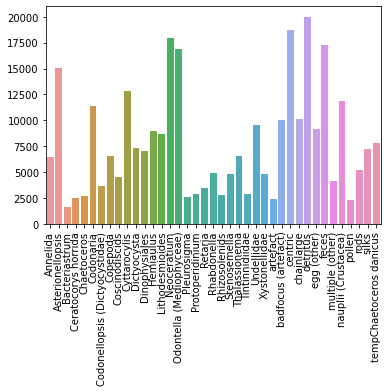

In [0]:
s_count = generatedy_train.sum(axis=0).tolist()
g = sns.barplot(class_dict, s_count)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
print(min(generatedy_train.sum(axis=0).tolist()))

In [0]:
np.save("drive/My Drive/LAB3/data/generatedX_train", generatedX_train)
np.save("drive/My Drive/LAB3/data/generatedy_train", generatedy_train)

# Model Selection

In [0]:
# X_train = np.load("drive/My Drive/LAB3/data/X_train.npy")
X_val = np.load("drive/My Drive/LAB3/data/X_val.npy")
# X_test = np.load("drive/My Drive/LAB3/data/X_test.npy")
generatedX_train = np.load("drive/My Drive/LAB3/data/generatedX_train.npy")

# y_train = pd.read_csv("drive/My Drive/LAB3/data/y_train.csv")
y_val = pd.read_csv("drive/My Drive/LAB3/data/y_val.csv")
# y_test = pd.read_csv("drive/My Drive/LAB3/data/y_test.csv")
generatedy_train = np.load("drive/My Drive/LAB3/data/generatedy_train.npy")

In [0]:
def f1(y_true, y_pred): #taken from old keras source code
 true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
 possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
 predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
 precision = true_positives / (predicted_positives + K.epsilon())
 recall = true_positives / (possible_positives + K.epsilon())
 f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
 return f1_val

## LeNet5 without data augment

In [0]:
# Instantiate an empty sequential model
model = keras.Sequential()
# C1 Convolutional Layer
model.add(layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', 
input_shape = (32,32,1), padding = 'same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh',
              padding = 'valid'))
# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# C5 Convolutional Layer
model.add(layers.Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh',
              padding = 'valid'))

# Flatten the CNN output to feed it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(units = 84, activation = 'tanh'))

# FC7 Output layer with softmax activation
model.add(layers.Dense(units = 39, activation = 'softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=[f1, 'accuracy'])

In [0]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=50,
           validation_data=(X_val, y_val), class_weight=None,
           verbose=2, shuffle=True)

Epoch 1/50
4853/4853 - 33s - loss: 1.2373 - f1: 0.5937 - accuracy: 0.6344 - val_loss: 1.0922 - val_f1: 0.6535 - val_accuracy: 0.6611
Epoch 2/50
4853/4853 - 30s - loss: 1.0185 - f1: 0.6555 - accuracy: 0.6791 - val_loss: 0.9806 - val_f1: 0.6565 - val_accuracy: 0.6867
Epoch 3/50
4853/4853 - 31s - loss: 0.9468 - f1: 0.6774 - accuracy: 0.6957 - val_loss: 0.9424 - val_f1: 0.6841 - val_accuracy: 0.6967
Epoch 4/50
4853/4853 - 30s - loss: 0.9091 - f1: 0.6892 - accuracy: 0.7046 - val_loss: 0.9238 - val_f1: 0.6920 - val_accuracy: 0.7040
Epoch 5/50
4853/4853 - 30s - loss: 0.8788 - f1: 0.6993 - accuracy: 0.7135 - val_loss: 0.8958 - val_f1: 0.6978 - val_accuracy: 0.7088
Epoch 6/50
4853/4853 - 30s - loss: 0.8578 - f1: 0.7072 - accuracy: 0.7183 - val_loss: 0.8719 - val_f1: 0.7058 - val_accuracy: 0.7176
Epoch 7/50
4853/4853 - 30s - loss: 0.8367 - f1: 0.7135 - accuracy: 0.7261 - val_loss: 0.8690 - val_f1: 0.7036 - val_accuracy: 0.7178
Epoch 8/50
4853/4853 - 30s - loss: 0.8231 - f1: 0.7173 - accuracy: 0.

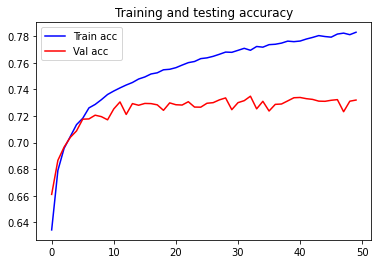

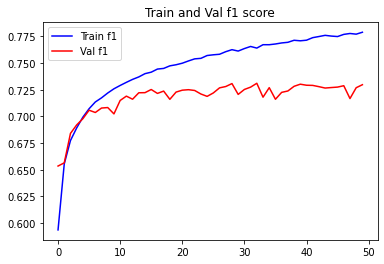

In [0]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
f1 = hist.history['f1']
val_f1 = hist.history['val_f1']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Train acc')
plt.plot(epochs, val_acc, 'r', label='Val acc')
plt.title('Training and testing accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, f1, 'b', label='Train f1')
plt.plot(epochs, val_f1, 'r', label='Val f1')
plt.title('Train and Val f1 score')
plt.legend()
 
plt.show()

In [0]:
y_predicted = model.predict(X_val)
predicted  = y_predicted.argmax(axis = 1)
y_val = y_val.values
y_val = y_val.argmax(axis = 1)
report = classification_report(y_val, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.06      0.12        77
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        30
           4       0.49      0.47      0.48       337
           5       0.51      0.19      0.28       135
           6       0.70      0.81      0.75       462
           7       0.51      0.37      0.43       822
           8       0.41      0.36      0.38        53
           9       0.00      0.00      0.00        16
          10       0.44      0.40      0.42        88
          11       1.00      0.01      0.02        84
          12       0.71      0.23      0.35       107
          13       0.00      0.00      0.00        11
          14       0.83      0.84      0.83      2242
          15       0.43      0.14      0.21        21
          16       0.50      0.03      0.06        31
          17       0.71    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LeNet5 with data augment

In [0]:
# Instantiate an empty sequential model
model = keras.Sequential()
# C1 Convolutional Layer
model.add(layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', 
input_shape = (32,32,1), padding = 'same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh',
              padding = 'valid'))
# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# C5 Convolutional Layer
model.add(layers.Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh',
              padding = 'valid'))

# Flatten the CNN output to feed it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(units = 84, activation = 'tanh'))

# FC7 Output layer with softmax activation
model.add(layers.Dense(units = 39, activation = 'softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=[f1, 'accuracy'])

In [0]:
hist = model.fit(generatedX_train, generatedy_train, batch_size=32, epochs=50,
           validation_data=(X_val, y_val), class_weight=None,
           verbose=2, shuffle=True)

Epoch 1/50
9552/9552 - 29s - loss: 2.1188 - f1: 0.2178 - accuracy: 0.3577 - val_loss: 1.5319 - val_f1: 0.4068 - val_accuracy: 0.5023
Epoch 2/50
9552/9552 - 30s - loss: 1.7359 - f1: 0.3768 - accuracy: 0.4623 - val_loss: 1.5832 - val_f1: 0.4159 - val_accuracy: 0.4890
Epoch 3/50
9552/9552 - 29s - loss: 1.6130 - f1: 0.4290 - accuracy: 0.4965 - val_loss: 1.2988 - val_f1: 0.5198 - val_accuracy: 0.5600
Epoch 4/50
9552/9552 - 30s - loss: 1.5385 - f1: 0.4600 - accuracy: 0.5195 - val_loss: 1.4594 - val_f1: 0.4868 - val_accuracy: 0.5311
Epoch 5/50
9552/9552 - 30s - loss: 1.4851 - f1: 0.4820 - accuracy: 0.5344 - val_loss: 1.3500 - val_f1: 0.5020 - val_accuracy: 0.5420
Epoch 6/50
9552/9552 - 30s - loss: 1.4438 - f1: 0.4997 - accuracy: 0.5480 - val_loss: 1.2651 - val_f1: 0.5344 - val_accuracy: 0.5707
Epoch 7/50
9552/9552 - 30s - loss: 1.4126 - f1: 0.5133 - accuracy: 0.5577 - val_loss: 1.4251 - val_f1: 0.4784 - val_accuracy: 0.5182
Epoch 8/50
9552/9552 - 30s - loss: 1.3891 - f1: 0.5232 - accuracy: 0.

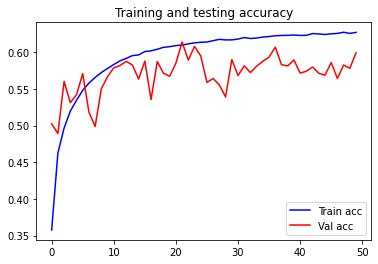

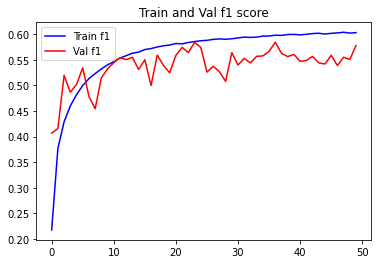

In [0]:
model.save('LeNet5.h5')

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
f1 = hist.history['f1']
val_f1 = hist.history['val_f1']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Train acc')
plt.plot(epochs, val_acc, 'r', label='Val acc')
plt.title('Training and testing accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, f1, 'b', label='Train f1')
plt.plot(epochs, val_f1, 'r', label='Val f1')
plt.title('Train and Val f1 score')
plt.legend()
 
plt.show()

In [0]:
y_predicted = model.predict(X_val)
predicted  = y_predicted.argmax(axis = 1)
y_val = y_val.values
y_val = y_val.argmax(axis = 1)
report = classification_report(y_val, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.19      0.26      0.22        77
           1       0.04      0.68      0.08        19
           2       0.10      1.00      0.17         2
           3       0.18      0.23      0.20        30
           4       0.41      0.34      0.37       337
           5       0.35      0.21      0.26       135
           6       0.56      0.77      0.65       462
           7       0.45      0.28      0.34       822
           8       0.31      0.30      0.30        53
           9       0.11      0.25      0.15        16
          10       0.22      0.33      0.26        88
          11       0.11      0.14      0.12        84
          12       0.25      0.49      0.33       107
          13       0.01      0.27      0.02        11
          14       0.72      0.84      0.77      2242
          15       0.04      0.76      0.08        21
          16       0.04      0.06      0.05        31
          17       0.71    

## LeNet5 with class_weight

In [0]:
y_integers = np.argmax(y_train.values, axis=1)

class_w = class_weight.compute_class_weight('balanced', np.unique(y_integers), y_integers)
classes = np.unique(y_integers)
class_weights = dict(zip(classes, class_w))

# print(class_w)
# print((len(y_train.values) / 39)  / y_train.values.sum(axis=0))
# print(class_weights)

In [0]:
# Instantiate an empty sequential model
model = keras.Sequential()
# C1 Convolutional Layer
model.add(layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', 
input_shape = (32,32,1), padding = 'same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh',
              padding = 'valid'))
# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# C5 Convolutional Layer
model.add(layers.Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh',
              padding = 'valid'))

# Flatten the CNN output to feed it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(units = 84, activation = 'tanh'))

# FC7 Output layer with softmax activation
model.add(layers.Dense(units = 39, activation = 'softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=[f1, 'accuracy'])

In [0]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=50,
           validation_data=(X_val, y_val), class_weight=class_weights,
           verbose=2, shuffle=True)

Epoch 1/50
4853/4853 - 19s - loss: 2.9374 - f1: 0.0041 - accuracy: 0.0631 - val_loss: 3.1124 - val_f1: 0.0437 - val_accuracy: 0.0904
Epoch 2/50
4853/4853 - 18s - loss: 2.5535 - f1: 0.0365 - accuracy: 0.1000 - val_loss: 3.2574 - val_f1: 0.0594 - val_accuracy: 0.0991
Epoch 3/50
4853/4853 - 18s - loss: 2.3715 - f1: 0.0564 - accuracy: 0.1127 - val_loss: 3.1019 - val_f1: 0.0727 - val_accuracy: 0.1069
Epoch 4/50
4853/4853 - 18s - loss: 2.2287 - f1: 0.0711 - accuracy: 0.1223 - val_loss: 3.0214 - val_f1: 0.0709 - val_accuracy: 0.1199
Epoch 5/50
4853/4853 - 18s - loss: 2.1331 - f1: 0.0777 - accuracy: 0.1321 - val_loss: 2.9552 - val_f1: 0.0715 - val_accuracy: 0.1241
Epoch 6/50
4853/4853 - 18s - loss: 2.0190 - f1: 0.0857 - accuracy: 0.1375 - val_loss: 2.9336 - val_f1: 0.0870 - val_accuracy: 0.1340
Epoch 7/50
4853/4853 - 18s - loss: 1.9318 - f1: 0.0933 - accuracy: 0.1492 - val_loss: 2.9697 - val_f1: 0.0861 - val_accuracy: 0.1363
Epoch 8/50
4853/4853 - 18s - loss: 1.8558 - f1: 0.1029 - accuracy: 0.

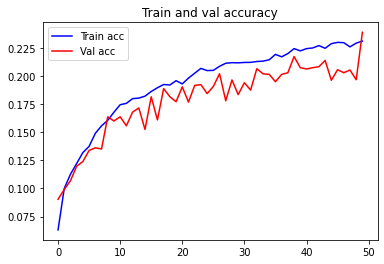

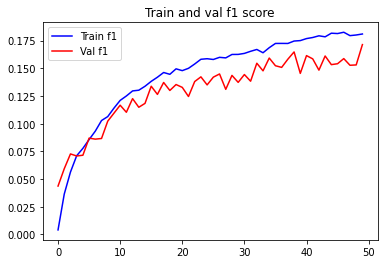

In [0]:

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
f1 = hist.history['f1']
val_f1 = hist.history['val_f1']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Train acc')
plt.plot(epochs, val_acc, 'r', label='Val acc')
plt.title('Train and val accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, f1, 'b', label='Train f1')
plt.plot(epochs, val_f1, 'r', label='Val f1')
plt.title('Train and val f1 score')
plt.legend()
 
plt.show()

In [0]:
y_predicted = model.predict(X_val)
predicted  = y_predicted.argmax(axis = 1)
y_val = y_val.values
y_val = y_val.argmax(axis = 1)
report = classification_report(y_val, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.03      0.29      0.05        77
           1       0.01      0.11      0.02        19
           2       0.00      0.00      0.00         2
           3       0.02      0.20      0.03        30
           4       0.15      0.44      0.23       337
           5       0.17      0.55      0.26       135
           6       0.33      0.69      0.45       462
           7       0.12      0.21      0.15       822
           8       0.16      0.45      0.24        53
           9       0.01      0.06      0.02        16
          10       0.11      0.49      0.19        88
          11       0.02      0.25      0.03        84
          12       0.05      0.58      0.08       107
          13       0.00      0.00      0.00        11
          14       0.55      0.51      0.53      2242
          15       0.03      0.43      0.05        21
          16       0.02      0.39      0.03        31
          17       0.19    

## Customed LeNet5 with data augment

In [0]:
# Instantiate an empty sequential model
model = keras.Sequential()
# C1 Convolutional Layer
model.add(layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', 
input_shape = (32,32,1), padding = 'same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# Dropout layer
model.add(layers.Dropout(0.2))

# C3 Convolutional Layer
model.add(layers.Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'relu',
              padding = 'valid'))
# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# Dropout layer
model.add(layers.Dropout(0.2))

# C5 Convolutional Layer
model.add(layers.Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'relu',
              padding = 'valid'))


# Flatten the CNN output to feed it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(units = 84, activation = 'relu'))

# FC7 Output layer with softmax activation
model.add(layers.Dense(units = 39, activation = 'softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         4

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=[f1, 'accuracy'])

In [0]:
hist = model.fit(generatedX_train, generatedy_train, batch_size=32, epochs=50,
           validation_data=(X_val, y_val), class_weight=None,
           verbose=2, shuffle=True)

Epoch 1/50
9552/9552 - 31s - loss: 2.0744 - f1: 0.2391 - accuracy: 0.3711 - val_loss: 1.8855 - val_f1: 0.3084 - val_accuracy: 0.3978
Epoch 2/50
9552/9552 - 31s - loss: 1.6443 - f1: 0.4069 - accuracy: 0.4876 - val_loss: 1.2699 - val_f1: 0.5261 - val_accuracy: 0.5685
Epoch 3/50
9552/9552 - 31s - loss: 1.5005 - f1: 0.4681 - accuracy: 0.5290 - val_loss: 1.2033 - val_f1: 0.5550 - val_accuracy: 0.5878
Epoch 4/50
9552/9552 - 31s - loss: 1.4248 - f1: 0.5015 - accuracy: 0.5525 - val_loss: 1.0985 - val_f1: 0.5942 - val_accuracy: 0.6177
Epoch 5/50
9552/9552 - 30s - loss: 1.3736 - f1: 0.5226 - accuracy: 0.5672 - val_loss: 1.0925 - val_f1: 0.5932 - val_accuracy: 0.6187
Epoch 6/50
9552/9552 - 31s - loss: 1.3366 - f1: 0.5377 - accuracy: 0.5785 - val_loss: 1.1268 - val_f1: 0.5892 - val_accuracy: 0.6116
Epoch 7/50
9552/9552 - 30s - loss: 1.3102 - f1: 0.5489 - accuracy: 0.5858 - val_loss: 1.1093 - val_f1: 0.5940 - val_accuracy: 0.6204
Epoch 8/50
9552/9552 - 31s - loss: 1.2948 - f1: 0.5550 - accuracy: 0.

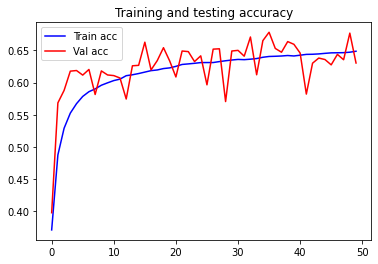

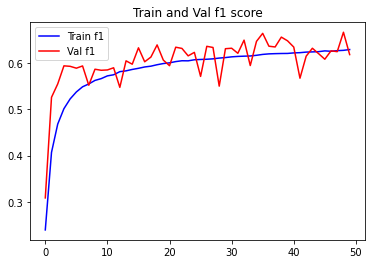

In [0]:
model.save('LeNet5_relu_dropout.h5')

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
f1 = hist.history['f1']
val_f1 = hist.history['val_f1']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Train acc')
plt.plot(epochs, val_acc, 'r', label='Val acc')
plt.title('Training and testing accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, f1, 'b', label='Train f1')
plt.plot(epochs, val_f1, 'r', label='Val f1')
plt.title('Train and Val f1 score')
plt.legend()
 
plt.show()

In [0]:
y_predicted = model.predict(X_val)
predicted  = y_predicted.argmax(axis = 1)
y_val = y_val.values
y_val = y_val.argmax(axis = 1)
report = classification_report(y_val, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.37      0.40      0.39        77
           1       0.04      0.47      0.07        19
           2       0.33      1.00      0.50         2
           3       0.33      0.47      0.38        30
           4       0.32      0.54      0.40       337
           5       0.52      0.18      0.27       135
           6       0.66      0.78      0.71       462
           7       0.65      0.28      0.40       822
           8       0.38      0.28      0.32        53
           9       0.38      0.19      0.25        16
          10       0.43      0.59      0.50        88
          11       0.13      0.10      0.11        84
          12       0.32      0.52      0.40       107
          13       0.02      0.09      0.03        11
          14       0.65      0.90      0.75      2242
          15       0.08      0.71      0.15        21
          16       0.06      0.10      0.08        31
          17       0.69    

## VGG16 Transfer learning

In [0]:
generatedX_train, X_ , generatedy_train, y_ = train_test_split(generatedX_train, generatedy_train, test_size=0.5, random_state=123, stratify = generatedy_train)

generatedX_train_3c = np.stack([generatedX_train.reshape(-1,32,32)]*3, axis=-1)
# X_val_3c = np.stack([X_val.reshape(-1,32,32)]*3, axis=-1)
del generatedX_train
del X_
del y_
# del X_val

In [0]:
# load model without output layer and specify a new input shape for images
base_model = VGG16(include_top=False, input_shape=(32,32,3), weights='imagenet')

base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(39, activation='softmax')
    ])

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=[f1, 'accuracy'])

In [0]:
hist = model.fit(generatedX_train_3c, generatedy_train, batch_size=32, epochs=50,
            verbose=2, shuffle=True)

Epoch 1/50
4776/4776 - 36s - loss: 1.5923 - f1: 0.3991 - accuracy: 0.5339
Epoch 2/50
4776/4776 - 36s - loss: 1.2830 - f1: 0.5471 - accuracy: 0.6116
Epoch 3/50
4776/4776 - 36s - loss: 1.2057 - f1: 0.5825 - accuracy: 0.6324
Epoch 4/50
4776/4776 - 36s - loss: 1.1624 - f1: 0.6010 - accuracy: 0.6444
Epoch 5/50
4776/4776 - 36s - loss: 1.1340 - f1: 0.6128 - accuracy: 0.6520
Epoch 6/50
4776/4776 - 36s - loss: 1.1132 - f1: 0.6219 - accuracy: 0.6567
Epoch 7/50
4776/4776 - 36s - loss: 1.0969 - f1: 0.6288 - accuracy: 0.6621
Epoch 8/50
4776/4776 - 36s - loss: 1.0839 - f1: 0.6347 - accuracy: 0.6655
Epoch 9/50
4776/4776 - 36s - loss: 1.0737 - f1: 0.6387 - accuracy: 0.6675
Epoch 10/50
4776/4776 - 36s - loss: 1.0649 - f1: 0.6423 - accuracy: 0.6703
Epoch 11/50
4776/4776 - 36s - loss: 1.0574 - f1: 0.6459 - accuracy: 0.6721
Epoch 12/50
4776/4776 - 36s - loss: 1.0516 - f1: 0.6485 - accuracy: 0.6737
Epoch 13/50
4776/4776 - 36s - loss: 1.0462 - f1: 0.6507 - accuracy: 0.6758
Epoch 14/50
4776/4776 - 36s - loss

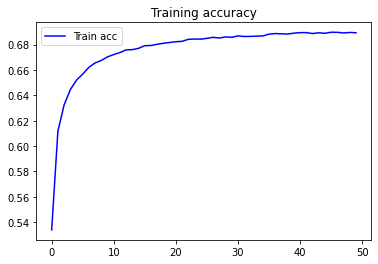

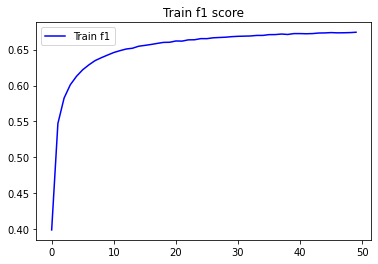

In [0]:

acc = hist.history['accuracy']
# val_acc = hist.history['val_accuracy']
f1 = hist.history['f1']
# val_f1 = hist.history['val_f1']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Train acc')
# plt.plot(epochs, val_acc, 'r', label='Val acc')
plt.title('Training accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, f1, 'b', label='Train f1')
# plt.plot(epochs, val_f1, 'r', label='Val f1')
plt.title('Train f1 score')
plt.legend()
 
plt.show()

In [0]:
del generatedX_train_3c
del generatedy_train

X_val = np.load("drive/My Drive/LAB3/data/X_val.npy")
y_val = pd.read_csv("drive/My Drive/LAB3/data/y_val.csv")

In [0]:
X_val_3c = np.stack([X_val.reshape(-1,32,32)]*3, axis=-1)
y_predicted = model.predict(X_val_3c)
predicted  = y_predicted.argmax(axis = 1)
y_val = y_val.values
y_val = y_val.argmax(axis = 1)
report = classification_report(y_val, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.21      0.61      0.31        77
           1       0.03      0.79      0.05        19
           2       0.14      1.00      0.25         2
           3       0.27      0.43      0.33        30
           4       0.58      0.55      0.56       337
           5       0.16      0.41      0.23       135
           6       0.71      0.78      0.74       462
           7       0.52      0.48      0.50       822
           8       0.20      0.57      0.29        53
           9       0.04      0.75      0.08        16
          10       0.17      0.65      0.27        88
          11       0.06      0.43      0.11        84
          12       0.28      0.69      0.40       107
          13       0.01      0.27      0.03        11
          14       0.73      0.85      0.79      2242
          15       0.03      0.67      0.06        21
          16       0.08      0.39      0.14        31
          17       0.62    

## Our model

In [0]:
model = keras.Sequential()

model.add(layers.Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (32,32,1)))
model.add(layers.Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(39, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        6416      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=[f1, 'accuracy'])

In [0]:
hist = model.fit(generatedX_train, generatedy_train, batch_size=32, epochs=50,
           validation_data=(X_val, y_val), class_weight=None,
           verbose=2, shuffle=True)

Epoch 1/50
9552/9552 - 45s - loss: 1.5449 - f1: 0.4711 - accuracy: 0.5257 - val_loss: 0.9488 - val_f1: 0.6428 - val_accuracy: 0.6674
Epoch 2/50
9552/9552 - 45s - loss: 1.0848 - f1: 0.6389 - accuracy: 0.6573 - val_loss: 0.9205 - val_f1: 0.6490 - val_accuracy: 0.6618
Epoch 3/50
9552/9552 - 45s - loss: 0.9376 - f1: 0.6918 - accuracy: 0.7017 - val_loss: 1.0030 - val_f1: 0.6330 - val_accuracy: 0.6408
Epoch 4/50
9552/9552 - 45s - loss: 0.8623 - f1: 0.7174 - accuracy: 0.7240 - val_loss: 0.7092 - val_f1: 0.7273 - val_accuracy: 0.7320
Epoch 5/50
9552/9552 - 45s - loss: 0.8099 - f1: 0.7344 - accuracy: 0.7390 - val_loss: 0.9021 - val_f1: 0.6600 - val_accuracy: 0.6676
Epoch 6/50
9552/9552 - 45s - loss: 0.7736 - f1: 0.7473 - accuracy: 0.7516 - val_loss: 0.8851 - val_f1: 0.6688 - val_accuracy: 0.6749
Epoch 7/50
9552/9552 - 46s - loss: 0.7427 - f1: 0.7572 - accuracy: 0.7603 - val_loss: 0.8042 - val_f1: 0.6885 - val_accuracy: 0.6933
Epoch 8/50
9552/9552 - 45s - loss: 0.7215 - f1: 0.7639 - accuracy: 0.

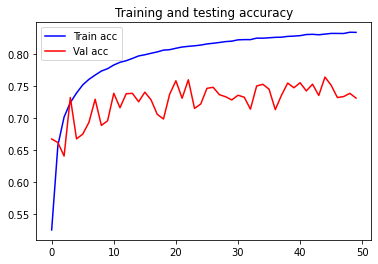

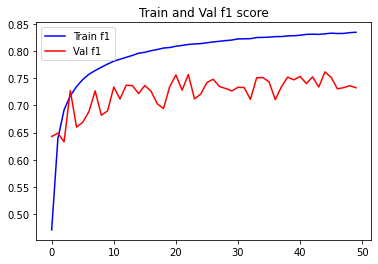

In [0]:
model.save('our_model.h5')

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
f1 = hist.history['f1']
val_f1 = hist.history['val_f1']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Train acc')
plt.plot(epochs, val_acc, 'r', label='Val acc')
plt.title('Training and testing accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, f1, 'b', label='Train f1')
plt.plot(epochs, val_f1, 'r', label='Val f1')
plt.title('Train and Val f1 score')
plt.legend()
 
plt.show()

In [0]:
y_predicted = model.predict(X_val)
predicted  = y_predicted.argmax(axis = 1)
y_val = y_val.values
y_val = y_val.argmax(axis = 1)
report = classification_report(y_val, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.44      0.65      0.52        77
           1       0.50      0.63      0.56        19
           2       0.33      1.00      0.50         2
           3       0.81      0.57      0.67        30
           4       0.67      0.74      0.70       337
           5       0.69      0.73      0.71       135
           6       0.78      0.91      0.84       462
           7       0.74      0.69      0.71       822
           8       0.28      0.68      0.40        53
           9       0.65      0.69      0.67        16
          10       0.56      0.81      0.66        88
          11       0.54      0.43      0.48        84
          12       0.50      0.73      0.59       107
          13       0.07      0.18      0.10        11
          14       0.87      0.93      0.90      2242
          15       0.28      0.76      0.41        21
          16       0.50      0.39      0.44        31
          17       0.68    

# Evaluation

In [0]:
model = keras.Sequential()

model.add(layers.Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (32,32,1)))
model.add(layers.Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(39, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        6416      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=[f1, 'accuracy'])

In [0]:
hist = model.fit(generatedX_train, generatedy_train, batch_size=32, epochs=100,
           validation_data=(X_val, y_val), class_weight=None,
           verbose=2, shuffle=True)

Epoch 1/100
9552/9552 - 46s - loss: 1.5329 - f1: 0.4737 - accuracy: 0.5274 - val_loss: 0.9847 - val_f1: 0.6483 - val_accuracy: 0.6597
Epoch 2/100
9552/9552 - 46s - loss: 1.0649 - f1: 0.6466 - accuracy: 0.6630 - val_loss: 0.8891 - val_f1: 0.6850 - val_accuracy: 0.6893
Epoch 3/100
9552/9552 - 46s - loss: 0.9204 - f1: 0.6982 - accuracy: 0.7071 - val_loss: 0.8206 - val_f1: 0.7003 - val_accuracy: 0.7079
Epoch 4/100
9552/9552 - 46s - loss: 0.8436 - f1: 0.7243 - accuracy: 0.7297 - val_loss: 0.8542 - val_f1: 0.6897 - val_accuracy: 0.6958
Epoch 5/100
9552/9552 - 46s - loss: 0.7902 - f1: 0.7418 - accuracy: 0.7466 - val_loss: 0.8116 - val_f1: 0.7038 - val_accuracy: 0.7068
Epoch 6/100
9552/9552 - 46s - loss: 0.7534 - f1: 0.7539 - accuracy: 0.7576 - val_loss: 0.6604 - val_f1: 0.7537 - val_accuracy: 0.7560
Epoch 7/100
9552/9552 - 46s - loss: 0.7228 - f1: 0.7642 - accuracy: 0.7670 - val_loss: 0.7931 - val_f1: 0.7028 - val_accuracy: 0.7105
Epoch 8/100
9552/9552 - 45s - loss: 0.6994 - f1: 0.7712 - accu

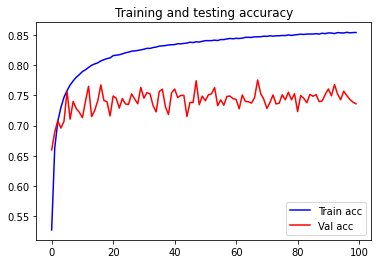

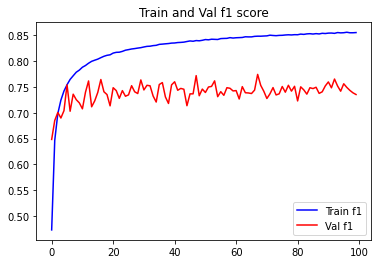

In [0]:
model.save('final_model.h5')

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
f1 = hist.history['f1']
val_f1 = hist.history['val_f1']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Train acc')
plt.plot(epochs, val_acc, 'r', label='Val acc')
plt.title('Training and testing accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, f1, 'b', label='Train f1')
plt.plot(epochs, val_f1, 'r', label='Val f1')
plt.title('Train and Val f1 score')
plt.legend()
 
plt.show()

In [0]:
del generatedX_train
del generatedy_train
X_test = np.load("drive/My Drive/LAB3/data/X_test.npy")
y_test = pd.read_csv("drive/My Drive/LAB3/data/y_test.csv")

y_predicted = model.predict(X_test)
predicted  = y_predicted.argmax(axis = 1)
y_test = y_test.values
y_test = y_test.argmax(axis = 1)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.43      0.65      0.52        96
           1       0.47      0.78      0.59        23
           2       0.33      0.50      0.40         2
           3       0.51      0.59      0.55        37
           4       0.68      0.78      0.73       421
           5       0.73      0.73      0.73       169
           6       0.81      0.93      0.87       578
           7       0.81      0.69      0.74      1028
           8       0.52      0.72      0.60        67
           9       0.59      0.50      0.54        20
          10       0.78      0.85      0.81       110
          11       0.45      0.41      0.43       105
          12       0.52      0.78      0.62       134
          13       0.08      0.07      0.07        14
          14       0.87      0.95      0.91      2803
          15       0.34      0.81      0.48        26
          16       0.37      0.39      0.38        38
          17       0.73    